Prepearing data:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
#/home/artem/Documents/2 course/Python/lab 7/lab7.1/hellowin/data_train

data_dir = '/home/artem/Documents/2_course/Python/lab 7/lab7.1/hellowin/data_train'

image_for_searching = cv2.imread('/home/artem/Documents/2_course/Python/lab 7/lab7.1/hellowin/lab7.png')
img1 = cv2.imread('/home/artem/Documents/2_course/Python/lab 7/lab7.1/hellowin/img_1.png')
img2 = cv2.imread('/home/artem/Documents/2_course/Python/lab 7/lab7.1/hellowin/img_2.png')
img3 = cv2.imread('/home/artem/Documents/2_course/Python/lab 7/lab7.1/hellowin/img_3.png')

angle = -90
for i in range(1, 4):
    (h, w) = img1.shape[:2]
    center = (int(w / 2), int(h / 2))
    rotation_matrix = cv2.getRotationMatrix2D(center, angle*i, 0.6)
    rotated = cv2.warpAffine(img1, rotation_matrix, (w, h))
    cv2.imwrite('/home/artem/Documents/2_course/Python/lab 7/lab7.1/hellowin/data_train/'+str(i)+'_img1.png', rotated)


cv2.imwrite('/home/artem/Documents/2_course/Python/lab 7/lab7.1/hellowin/data_train/2_img2.png', img2)

res = cv2.flip(img3, 1)
cv2.imwrite('/home/artem/Documents/2_course/Python/lab 7/lab7.1/hellowin/data_train/1_img3.png', res)
cv2.imwrite('/home/artem/Documents/2_course/Python/lab 7/lab7.1/hellowin/data_train/2_img3.png', img3)


True

In [4]:
print(img3.shape)
print(img3.dtype)

(221, 215, 3)
uint8


In [5]:
list_data = os.listdir(data_dir)

image_for_searching_color = cv2.cvtColor(image_for_searching, cv2.IMREAD_COLOR)

image_for_searching_gray = cv2.cvtColor(image_for_searching, cv2.IMREAD_GRAYSCALE)


for current_img in list_data:
    
    img_path = os.path.join(data_dir, current_img)
    image1_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    sift = cv2.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(image1_gray, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(image_for_searching_gray, None)

    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(descriptors_1, descriptors_2)
    matches = sorted(matches, key=lambda x: x.distance)


    src_pts = []
    for m in matches:
        src_pts.append(keypoints_1[m.queryIdx].pt)
    src_pts = np.float32(src_pts).reshape(-1, 1, 2)


    dst_pts = []
    for m in matches:
        dst_pts.append(keypoints_2[m.trainIdx].pt)
    dst_pts = np.float32(dst_pts).reshape(-1, 1, 2)

    #print(src_pts)
    
    matrix, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    
    #print(matrix)

    h, w = image1_gray.shape
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2) 
    dst = cv2.perspectiveTransform(pts, matrix) 


    cv2.polylines(image_for_searching_color, [np.int32(dst)], True, (0, 255, 0), 3, cv2.LINE_AA)

    cv2.fillPoly(image_for_searching_gray, [np.int32(dst)], (0, 100, 110))


    

cv2.namedWindow('Custom Window', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Custom Window', 960, 536)
cv2.imshow('Custom Window', image_for_searching_color)

cv2.imwrite("result.jpg", image_for_searching_color)

cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/artem/miniconda3/envs/comp_nets_env/lib/python3.13/site-packages/cv2/qt/plugins"


## Result

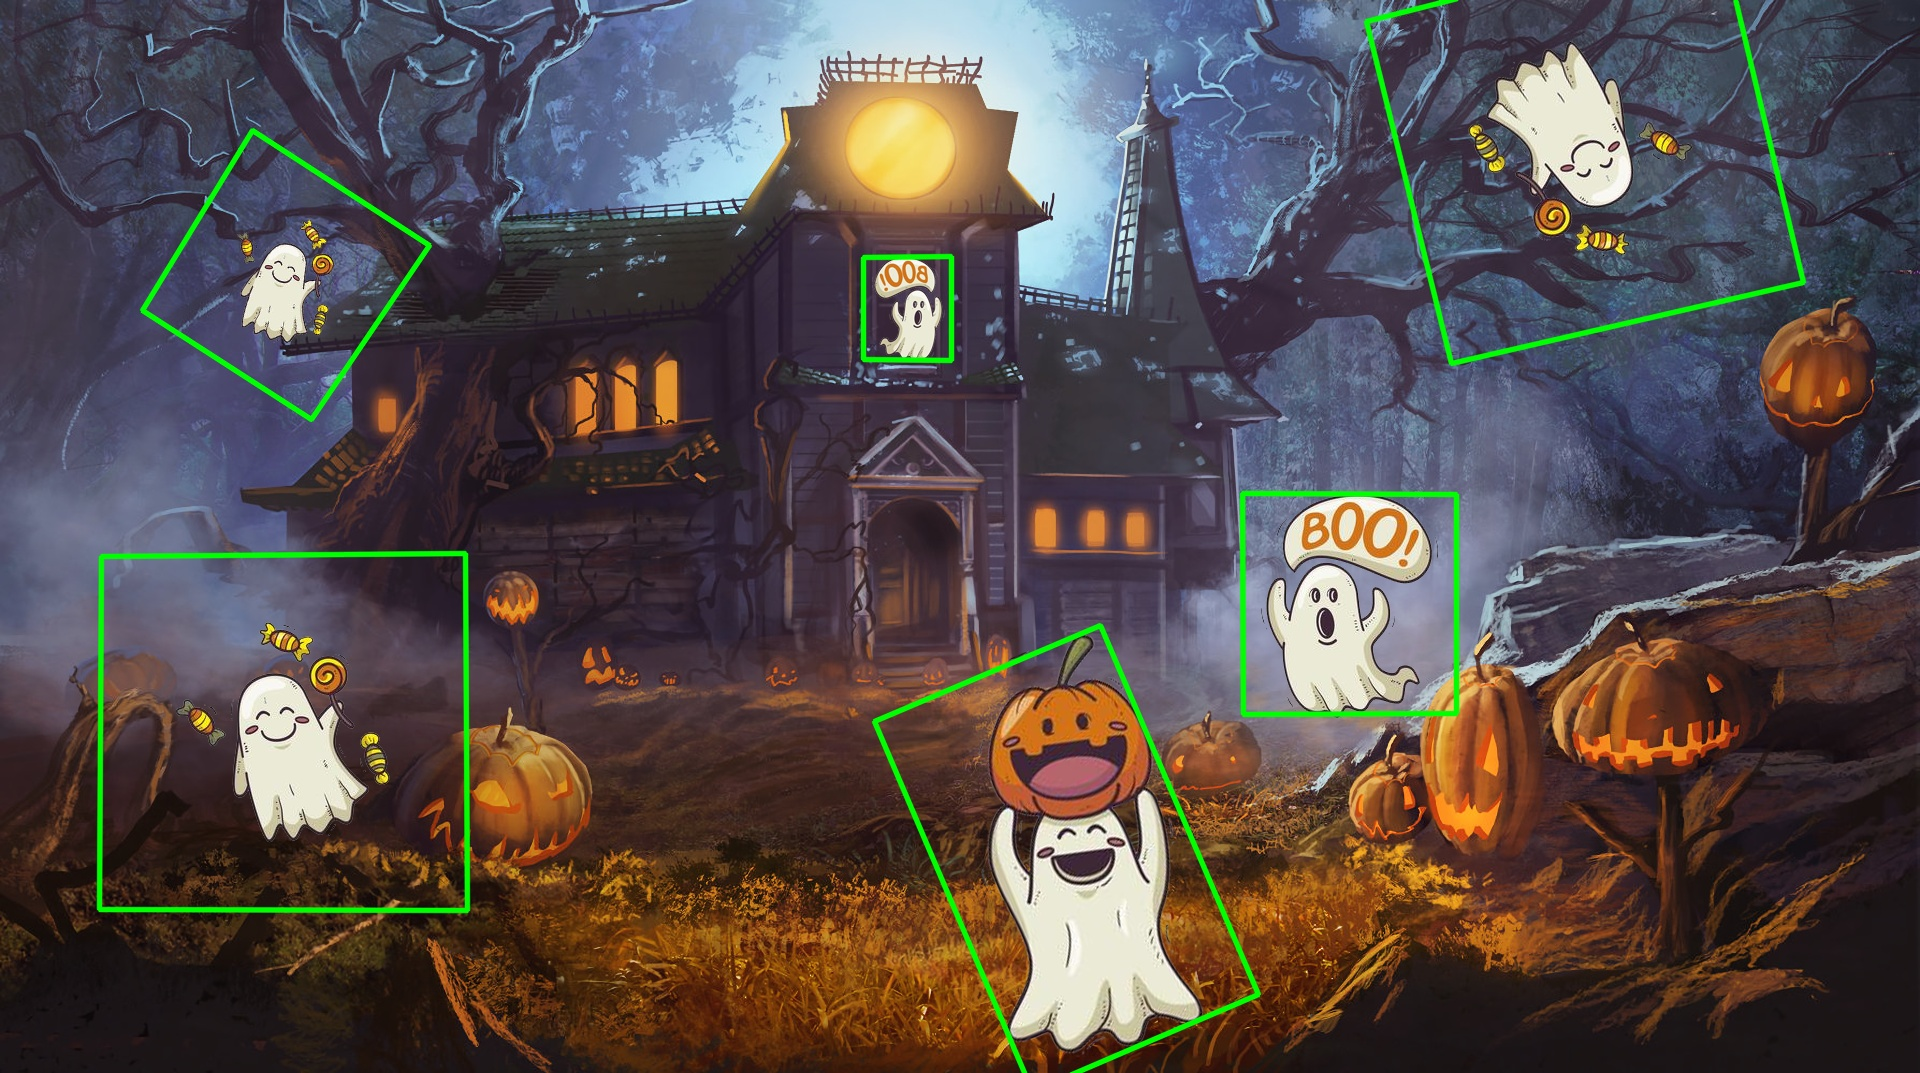